In [1]:
import os
import glob
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from scipy.stats import linregress, spearmanr, pearsonr
import numpy as np
import math
import seaborn as sns
%matplotlib inline
matplotlib.rcParams.update({'axes.linewidth': 0.25,
                            'xtick.major.size': 2,
                            'xtick.major.width': 0.25,
                            'ytick.major.size': 2,
                            'ytick.major.width': 0.25,
                            'pdf.fonttype': 42,
                            'font.sans-serif': 'Arial',
                           'ps.fonttype':42})

In [2]:
path = '../../smomics_data'


In [3]:
import warnings
warnings.filterwarnings('ignore')

# mRNA

In [4]:
# Read file
filename = os.path.join(path, 'lambdas_pmeans_spleen_exons_mRNA_6tags.tsv')
lambda_posterior_means_6tags = pd.read_csv(filename, index_col=0, sep='\t', header=[0,1])
filename = os.path.join(path, 'lambdas_pmeans_spleen_exons_mRNA_ifs.tsv')
lambda_posterior_means_ifs = pd.read_csv(filename, index_col=0, sep='\t', header=[0,1])

In [5]:
# Change names on genes, ie remove '_'
nwe=[]
nm=lambda_posterior_means_6tags.index
for item in nm:
    nwe.append(str(item).split("_")[0])
lambda_posterior_means_6tags.index = nwe

# Take exp()
lambda_posterior_means_6tags = lambda_posterior_means_6tags.astype(float)
lambda_posterior_means_6tags = np.exp(lambda_posterior_means_6tags-1)

# Change names on genes, ie remove '_'
nwe=[]
nm=lambda_posterior_means_ifs.index
for item in nm:
    nwe.append(str(item).split("_")[0])
lambda_posterior_means_ifs.index = nwe

# Take exp()
lambda_posterior_means_ifs = lambda_posterior_means_ifs.astype(float)
lambda_posterior_means_ifs = np.exp(lambda_posterior_means_ifs-1)


In [6]:
# Select gene
pd.set_option('display.max_colwidth', -1)
genes = ['Adgre1', 'Ighd', ]

collect_genes = {}
for gene in genes:
    # subset all genes
    
    if not gene in lambda_posterior_means_6tags.index:
        continue
    
    lambda_gene_6tags = lambda_posterior_means_6tags.loc[gene, :].to_frame().reset_index()
    lambda_gene_6tags =  lambda_gene_6tags[(lambda_gene_6tags[gene] > np.percentile(lambda_gene_6tags[gene].values,0.5)) & (lambda_gene_6tags[gene] < np.percentile(lambda_gene_6tags[gene].values,100))]
    # Get name of file, for plotting
    lambda_gene_6tags['name'] = lambda_gene_6tags['file'].str.split('/').str[-1].str.split('_stdata').str[0]

    lambda_gene_ifs = lambda_posterior_means_ifs.loc[gene, :].to_frame().reset_index()
    lambda_gene_ifs =  lambda_gene_ifs[(lambda_gene_ifs[gene] > np.percentile(lambda_gene_ifs[gene].values,0.5)) & (lambda_gene_ifs[gene] < np.percentile(lambda_gene_ifs[gene].values,100))]
    # Get name of file, for plotting
    lambda_gene_ifs['name'] = lambda_gene_ifs['file'].str.split('/').str[-1].str.split('_stdata').str[0]
       
    collect_genes[gene] = lambda_gene_6tags.append(lambda_gene_ifs)


# Ab

In [7]:
# Read file
filename = os.path.join(path, 'lambdas_pmeans_spleen_exons_tags_6tags.tsv')
lambda_posterior_meansTAGS_6tags = pd.read_csv(filename, index_col=0, sep='\t', header=[0,1])

# Take exp()
lambda_posterior_meansTAGS_6tags = lambda_posterior_meansTAGS_6tags.astype(float)
lambda_posterior_meansTAGS_6tags = np.exp(lambda_posterior_meansTAGS_6tags-1)

# Read file
filename = os.path.join(path, 'lambdas_pmeans_spleen_exons_tags_ifs.tsv')
lambda_posterior_meansTAGS_ifs = pd.read_csv(filename, index_col=0, sep='\t', header=[0,1])

# Take exp()
lambda_posterior_meansTAGS_ifs = lambda_posterior_meansTAGS_ifs.astype(float)
lambda_posterior_meansTAGS_ifs = np.exp(lambda_posterior_meansTAGS_ifs-1)


In [8]:
# Change names on genes, ie remove '_'
nwe=[]
nm=lambda_posterior_meansTAGS_ifs.index
for item in nm:
    nwe.append(str(item).split("-")[0])
lambda_posterior_meansTAGS_ifs.index = nwe

# Change names on genes, ie remove '_'
nwe=[]
nm=lambda_posterior_meansTAGS_6tags.index
for item in nm:
    nwe.append(str(item).split("-")[0])
lambda_posterior_meansTAGS_6tags.index = nwe

In [9]:
# Select gene
pd.set_option('display.max_colwidth', -1)
tags = lambda_posterior_meansTAGS_ifs.index

collect_tags = {}
for tag in tags:
    lambda_tag_ifs = lambda_posterior_meansTAGS_ifs.loc[tag, :].to_frame().reset_index()
    lambda_tag_ifs =  lambda_tag_ifs[(lambda_tag_ifs[tag] > np.percentile(lambda_tag_ifs[tag].values,0.1)) & (lambda_tag_ifs[tag] < np.percentile(lambda_tag_ifs[tag].values,100))]
    # Get name of file, for plotting

    # Get name of file, for plotting
    lambda_tag_ifs['name'] = lambda_tag_ifs['file'].str.split('/').str[-1].str.split('_stdata').str[0]
    
    lambda_tag_6tags = lambda_posterior_meansTAGS_6tags.loc[tag, :].to_frame().reset_index()
    lambda_tag_6tags =  lambda_tag_6tags[(lambda_tag_6tags[tag] > np.percentile(lambda_tag_6tags[tag].values,0.1)) & (lambda_tag_6tags[tag] < np.percentile(lambda_tag_6tags[tag].values,100))]
    # Get name of file, for plotting

    # Get name of file, for plotting
    lambda_tag_6tags['name'] = lambda_tag_6tags['file'].str.split('/').str[-1].str.split('_stdata').str[0]
    collect_tags[tag] = lambda_tag_6tags.append(lambda_tag_ifs)


# Annotation

In [10]:
annot_list = []

for stdata in list(set(list(lambda_tag_6tags['name'].tolist()+lambda_tag_ifs['name'].tolist()))):
    
    well = stdata
    
    if well == '10015CN87_C2':
        continue
       
    filename = os.path.join(path, well + '_stdata_adjusted.tsv.annotations.tsv')

    annot_file = pd.read_csv(filename, sep = '\t')
    annot_file = pd.melt(annot_file, id_vars='Unnamed: 0')
    annot_file = annot_file[annot_file['value'] != 0]
    annot_file['image'] = well
    annot_file.drop(['value'], axis=1, inplace=True)
    annot_file.rename(columns = {'Unnamed: 0':'value', 'variable':'x_y'}, inplace=True)
    annot_list.append(annot_file)
    
# Concat
annotdf = pd.concat(annot_list)

#clean up 
annotdf = annotdf[~annotdf['value'].isin(['White pulp'])]



In [11]:
annotdf['value'] = annotdf['value'].replace({'B follicle':'B follicle',
                         'PALS':'PALS',
                         'Marginal zone':'Marginal zone',})

In [12]:
annotdf.groupby('value').count()

,x_y,image
value,,
B follicle,1040,1040
Marginal zone,226,226
PALS,335,335
Red pulp,1677,1677


# Merge gene + ab + annotation

In [13]:
collect_merged = {}
for count, gene in enumerate(collect_genes):
    
    if gene == "Adgre1":
        tag = "F480"
    if gene == "Ighd":
        tag = "IgD"
    if gene == "Cd8a":
        tag = "CD8a"
    if gene == "Cd4":
        tag = "CD4"
    if gene == "Cd38":
        tag = "CD38"
    if gene == "Cd163":
        tag = "CD163"   
        
        
        
        
    lambda_gene = collect_genes[gene]
    
    if not tag in lambda_posterior_meansTAGS_ifs.index:
        continue
    
    lambda_tag = collect_tags[tag]
              
    # clean up naming
    lambda_gene.index = [str(i)+"_"+str(j) for i,j in zip(lambda_gene['name'], lambda_gene['coordinate'])]
    lambda_gene = lambda_gene.drop("file", axis = 1)
    lambda_tag = lambda_tag.drop("file", axis = 1)
    
    lambda_tag.index = [i+"_"+j for i,j in zip(lambda_tag['name'], lambda_tag['coordinate'])]
    annotdf.index = [i+"_"+j for i,j in zip(annotdf['image'], annotdf['x_y'])]
    
    #merge dfs
    lambdadfTMP = pd.merge(lambda_gene, lambda_tag,  left_index = True, right_index = True)
    lambdadf = pd.merge(lambdadfTMP, annotdf, how='left', left_index = True, right_index = True)
    
    # select annotation area
    lambdadf_rm = lambdadf[lambdadf['value'].isin(['Red pulp','Marginal zone', 'B follicle', 'PALS', 'White pulp'])]
    
    # check if anything needs removing
    # Remove sample (only want 3 samples)
    sample_to_rm = ['']
    print(lambdadf_rm['name_x'])
    lambdadf_rm = lambdadf_rm[~lambdadf_rm['name_x'].isin(sample_to_rm)]
    lambdadf_rm[[tag, gene]] = lambdadf_rm[[tag, gene]].transform(lambda x: preprocessing.scale(x))
    
    #get averages per annotation regions
    trans = lambdadf_rm.groupby(['name_x', 'value'])[tag, gene].mean()
    trans.reset_index(inplace=True)

    # Scale min max per sample
    trans[[tag + '.norm', gene + '.norm']] = trans.groupby(['name_x'])[tag, gene].transform(lambda x: preprocessing.minmax_scale(x))#preprocessing.minmax_scale(x))
    collect_merged[gene] = trans


10015CN87_D1_30_24    10015CN87_D1
10015CN87_D1_23_20    10015CN87_D1
10015CN87_D1_12_13    10015CN87_D1
10015CN87_D1_29_19    10015CN87_D1
10015CN87_D1_15_16    10015CN87_D1
                          ...     
10015CN88_D1_14_19    10015CN88_D1
10015CN88_D1_20_26    10015CN88_D1
10015CN88_D1_26_18    10015CN88_D1
10015CN88_D1_20_19    10015CN88_D1
10015CN88_D1_10_15    10015CN88_D1
Name: name_x, Length: 3220, dtype: object
10015CN87_D1_30_24    10015CN87_D1
10015CN87_D1_23_20    10015CN87_D1
10015CN87_D1_12_13    10015CN87_D1
10015CN87_D1_29_19    10015CN87_D1
10015CN87_D1_15_16    10015CN87_D1
                          ...     
10015CN88_D1_14_19    10015CN88_D1
10015CN88_D1_20_26    10015CN88_D1
10015CN88_D1_26_18    10015CN88_D1
10015CN88_D1_20_19    10015CN88_D1
10015CN88_D1_10_15    10015CN88_D1
Name: name_x, Length: 3223, dtype: object


Adgre1
std err:0.191
Spearman's rho: 0.43
p-value: 0.02095575193713524
Ighd
std err:0.138
Spearman's rho: 0.71
p-value: 2.3953654313225796e-05


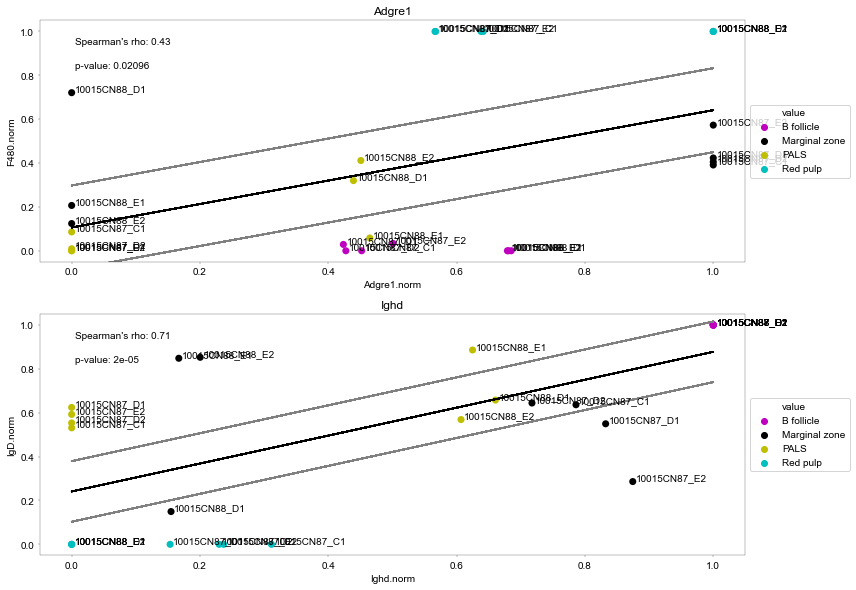

In [14]:
fig = matplotlib.pyplot.figure(figsize=(12, 12))
num_cols = 1
axes = []

for i in range(0,int((int(len(genes))/num_cols))):
    for j in range(0, num_cols):
        ax = plt.subplot2grid((int((len(genes))/num_cols+1), num_cols), (i, j))
        axes.append(ax) 
for count, gene in enumerate(collect_merged):

    ax = axes[count]
    plot_trans = collect_merged[gene]
    
    if gene == "Adgre1":
        tag = "F480"
    if gene == "Ighd":
        tag = "IgD"
    if gene == "Cd8a":
        tag = "CD8a"
    if gene == "Cd4":
        tag = "CD4"
    if gene == "Cd38":
        tag = "CD38"
    if gene == "Cd163":
        tag = "CD163"
    
    if not tag + '.norm' in plot_trans.columns:
        continue

    plot_trans['jitter_y'] = plot_trans[tag + '.norm']# + 0.05 * np.random.rand(len(plot_trans[tag + '.norm'].tolist())) +0.01
    plot_trans['jitter_x'] = plot_trans[gene + '.norm']# + 0.05 * np.random.rand(len(plot_trans[gene + '.norm'].tolist())) +0.01
    x = 'jitter_x'
    y = 'jitter_y'
    hue = 'value'
    palette = {'Red pulp':'c', 'B follicle':'m', 'PALS':'y', 'Marginal zone':'k', 'White pulp':'r', 'IGDpos':'b'}
    data = plot_trans

    sns.scatterplot(x=x, y=y, data=data, ax=ax, hue=hue, s=50, linewidth=0, palette=palette, )

    # X and Y axis
    ax.set_xlabel(gene + '.norm')
    ax.set_ylabel(tag + '.norm')

    # Calculate the linear regression
    X = gene + '.norm'
    Y = tag + '.norm'

    slope, intercept, r_value, p_value, std_err = linregress(data[X], data[Y])

    print(gene)
    print('std err:' + str(round(std_err, 3)))

    coef = np.polyfit(data[X],data[y],1)
    poly1d_fn = np.poly1d(coef)
    ax.plot(data[X], poly1d_fn(data[X]), c="k")
    ax.plot(data[X], poly1d_fn(data[X])+std_err, c="grey")
    ax.plot(data[X], poly1d_fn(data[X])-std_err, c="grey")
    #ax.errorbar(trans[x], poly1d_fn(trans[x]), yerr=poly1d_fn(trans[x]) - trans[y], fmt='.k')

    # Spearman's & Pearson's r
    spear, ps = spearmanr(data[X], data[Y])
    pear, pp = pearsonr(data[X], data[Y])
    print("Spearman's rho: " + str(round(spear, 2)))
    print("p-value: " + str(ps))

    ax.text(0.05, 0.9, "Spearman's rho: " + str(round(spear, 2)), transform=ax.transAxes, fontsize=10)
    ax.text(0.05, 0.8, "p-value: " + str(round(ps, 5)), transform=ax.transAxes, fontsize=10)
    #ax.get_legend().remove()

    # title
    ax.set_title(gene)

    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()    
    for i, txt in enumerate(plot_trans['name_x']):
        ax.annotate(txt, (plot_trans['jitter_x'][i]+0.005, plot_trans['jitter_y'][i]+0.005))

# plt.savefig("../../figures/sm_mrna_vs_tags_f480_adgre1.pdf", transparent=True, bbox_inches = 'tight',
#    pad_inches = 0, dpi=1200, rasterized=True)

In [15]:
len(np.unique(plot_trans['name_x']))

7